# **Import Necessary Libraries**

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# **Load the Dataset**

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Check data types and shapes
print(f"x_train data type: {type(x_train)}")
print(f"y_train data type: {type(y_train)}")
print(f"x_test data type: {type(x_test)}")
print(f"y_test data type: {type(y_test)}")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train data type: <class 'numpy.ndarray'>
y_train data type: <class 'numpy.ndarray'>
x_test data type: <class 'numpy.ndarray'>
y_test data type: <class 'numpy.ndarray'>
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


# **Understand And Organize the Datase**

In [20]:
print(f"Unique values in y_train: {np.unique(y_train)}")
print(f"Unique values in y_test: {np.unique(y_test)}")
print(f"Any missing values in x_train: {np.any(np.isnan(x_train))}")
print(f"Any missing values in y_test: {np.any(np.isnan(y_test))}")


Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]
Any missing values in x_train: False
Any missing values in y_test: False


***How many different label values do we have?***

In [21]:
# Number of classes
num_labels = len(np.unique(y_train))
print(f"Number of unique labels: {num_labels}")

Number of unique labels: 10


## **Frequency Distribution of Target Labels y_train and y_test**

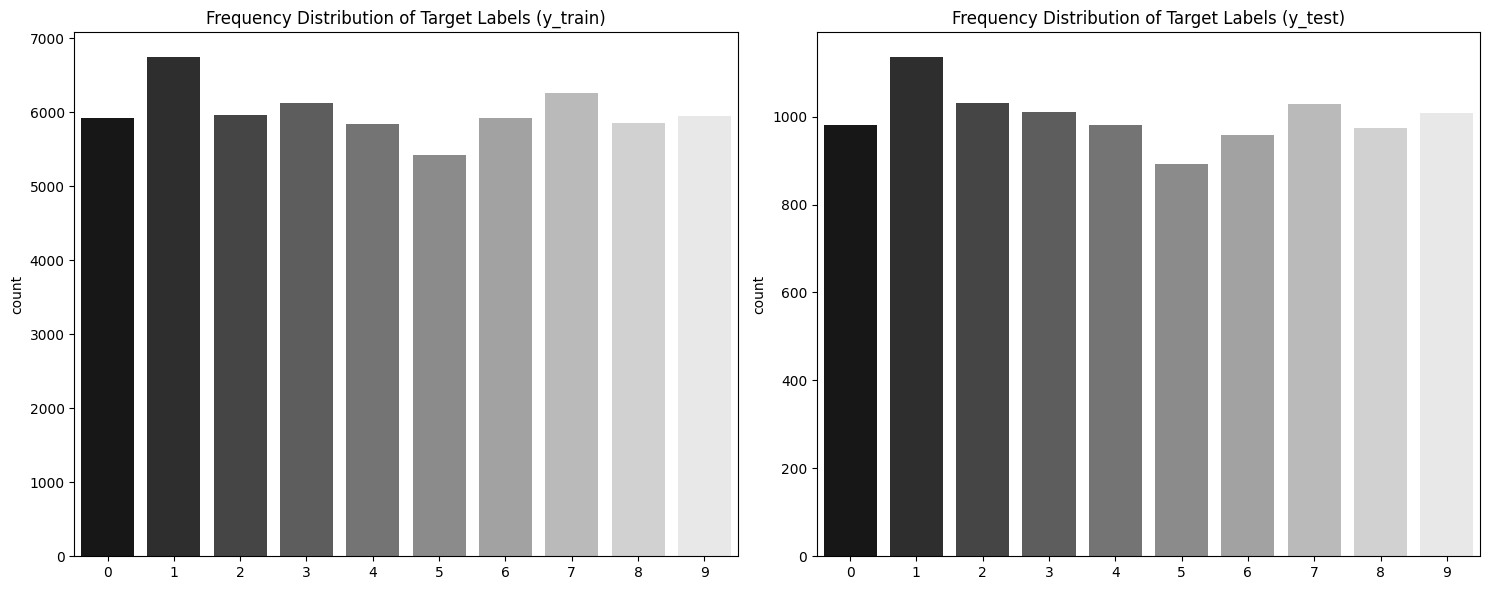

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x=y_train, palette='gray', ax=axes[0])
axes[0].set_title('Frequency Distribution of Target Labels (y_train)')
sns.countplot(x=y_test, palette='gray', ax=axes[1])
axes[1].set_title('Frequency Distribution of Target Labels (y_test)')
plt.tight_layout()
plt.show()

## **Visualization of Some Digits and Their Labels**

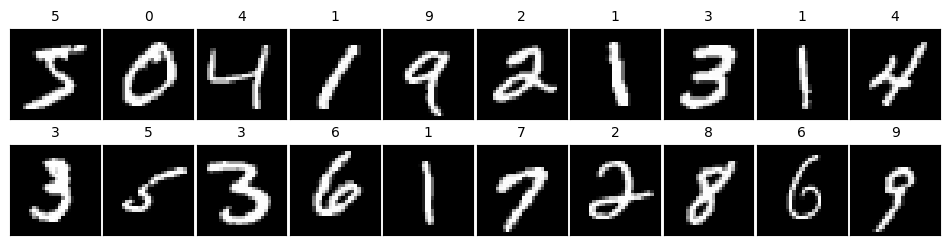

In [24]:
def visualize_images(data):
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(12,3),
                             gridspec_kw={'wspace':0.04, 'hspace':0.01})
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i], cmap='gray')
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_title(str(y_train[i]), fontsize=10)
    plt.tight_layout()
    plt.show()

visualize_images(x_train)

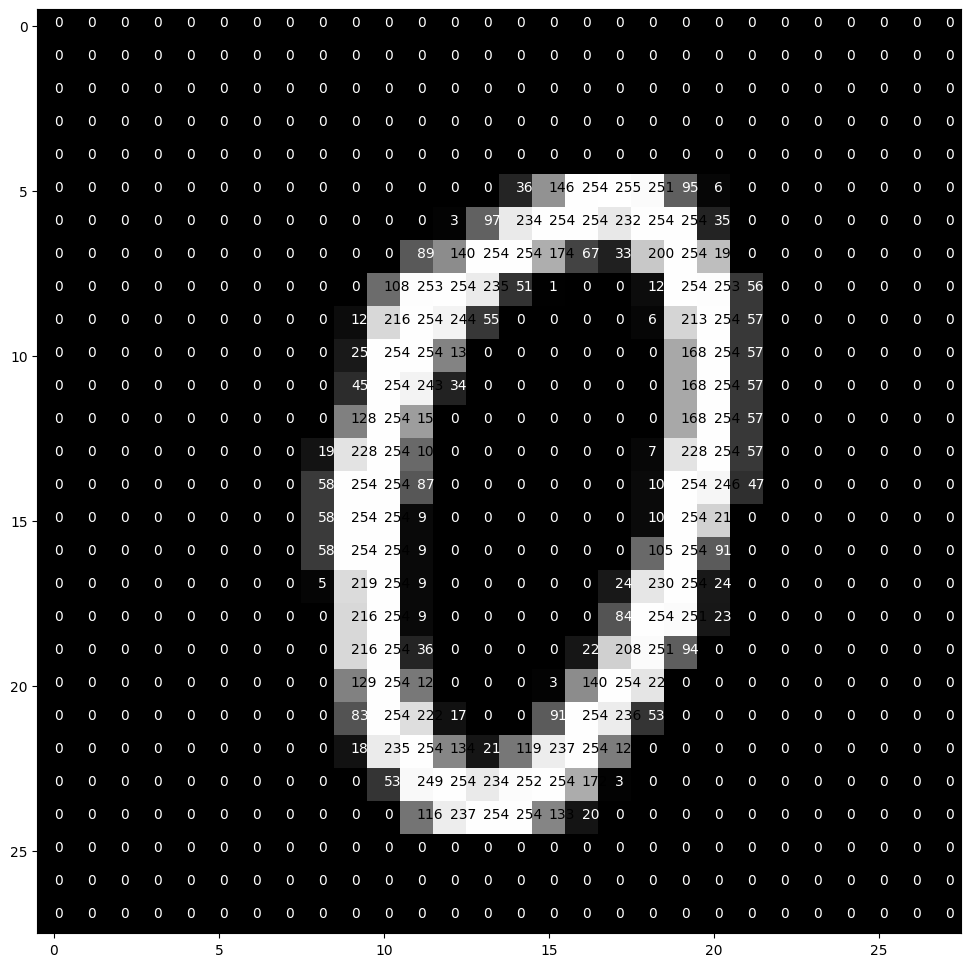

In [25]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")
    width, height = img.shape
    threshold = img.max() / 2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                        color='white' if img[x][y] < threshold else 'black')

pixel_visualize(x_train[1000])


##  **Preprocessing**

In [26]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [27]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [28]:
y_train = to_categorical(y_train, num_labels)
y_test = to_categorical(y_test, num_labels)

print("Preprocessing complete.")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Preprocessing complete.
x_train shape: (60000, 784)
x_test shape: (10000, 784)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [40]:
model = Sequential([
    Flatten(input_shape=(784,)),  # Input layer: Flatten 28x28 images into 784-dimensional vector

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(num_labels, activation='softmax')  # Output layer: 10 classes for digits 0–9
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'accuracy'])

# Print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 843,594 (3.22 MB)

 Trainable params: 840,650 (3.21 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [41]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)


In [42]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.6575 - loss: 1.1005 - precision_3: 0.8037 - recall_3: 0.5483 - val_accuracy: 0.7630 - val_loss: 0.6474 - val_precision_3: 0.8270 - val_recall_3: 0.6810
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9316 - loss: 0.2377 - precision_3: 0.9491 - recall_3: 0.9150 - val_accuracy: 0.8868 - val_loss: 0.3498 - val_precision_3: 0.9002 - val_recall_3: 0.8747
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9518 - loss: 0.1659 - precision_3: 0.9626 - recall_3: 0.9433 - val_accuracy: 0.9451 - val_loss: 0.1714 - val_precision_3: 0.9523 - val_recall_3: 0.9413
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9644 - loss: 0.1198 - precision_3: 0.9714 - recall_3: 0.9573 - val_accuracy: 0.9677 - val_loss: 0.1115 - val_precision_3: 0.9707 - val_recall_3: 0.9651
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9713 - loss: 0.0948 - precision_3: 0.9768 - recall_3: 0.9678 - val_acc

In [43]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)
print(f'Test Accuracy: {acc:.4f}')
print(f'Test Loss: {loss:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')

Test Accuracy: 0.9817
Test Loss: 0.0730
Test Precision: 0.9831
Test Recall: 0.9809


## **Using ImageDataGenerator**

In [44]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


## **EarlyStopping**

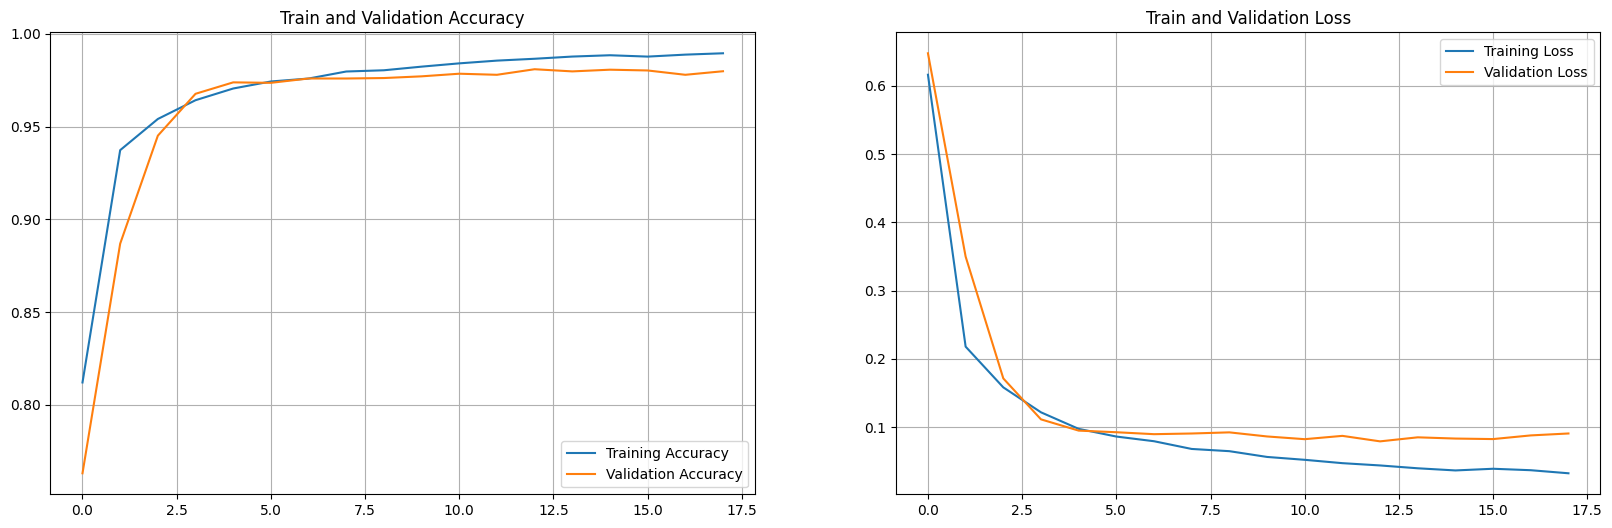

In [45]:
# Plot accuracy and loss
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train and Validation Accuracy')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.grid(True)
plt.show()

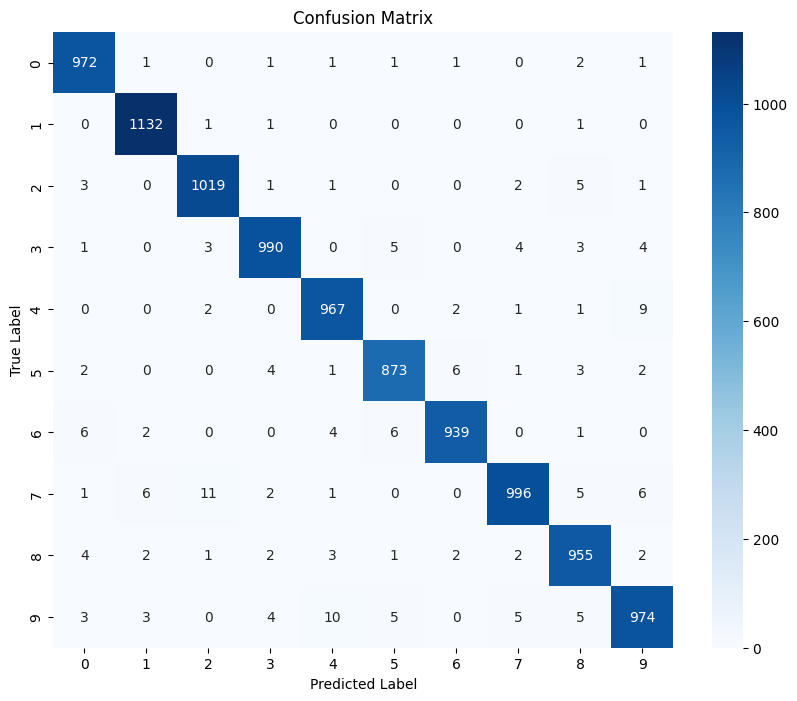

In [46]:
conf_matrix = confusion_matrix(y_true, y_pred_class)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()